In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your dataset path
train_dataset_path = 'F:/BE_Practicals_sem_VII/Brain Tumor-20231113T132857Z-001/Brain Tumor/brain tumour/Training'
test_dataset_path = 'F:/BE_Practicals_sem_VII/Brain Tumor-20231113T132857Z-001/Brain Tumor/brain tumour/Testing'

# Define parameters
input_shape = (224, 224, 3)  # adjust based on your dataset
batch_size = 32
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',  # adjust for binary or multi-class classification
    subset=None
)

test_generator = train_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset=None
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [2]:
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [3]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, input_shape=(224,224,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, kernel_size=3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(384, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [4]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
H = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
90/90 [==============================] - 143s 2s/step - loss: 0.9118 - accuracy: 0.5934 - val_loss: 2.2282 - val_accuracy: 0.4416
Epoch 2/10
90/90 [==============================] - 137s 2s/step - loss: 0.5201 - accuracy: 0.7767 - val_loss: 1.8635 - val_accuracy: 0.4340
Epoch 3/10
90/90 [==============================] - 137s 2s/step - loss: 0.3105 - accuracy: 0.8746 - val_loss: 1.8418 - val_accuracy: 0.6294
Epoch 4/10
90/90 [==============================] - 136s 2s/step - loss: 0.2069 - accuracy: 0.9226 - val_loss: 2.4327 - val_accuracy: 0.5914
Epoch 5/10
90/90 [==============================] - 136s 2s/step - loss: 0.1462 - accuracy: 0.9474 - val_loss: 2.3735 - val_accuracy: 0.6904
Epoch 6/10
90/90 [==============================] - 135s 2s/step - loss: 0.0780 - accuracy: 0.9700 - val_loss: 3.1850 - val_accuracy: 0.6701
Epoch 7/10
90/90 [==============================] - 135s 2s/step - loss: 0.0781 - accuracy: 0.9753 - val_loss: 3.0728 - val_accuracy: 0.7081
Epoch 8/10
90

In [7]:
import os

labels = os.listdir('F:/BE_Practicals_sem_VII/Brain Tumor-20231113T132857Z-001/Brain Tumor/brain tumour/Training')
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [12]:
from tensorflow.keras.preprocessing import image
import random

def get_random_paths(path):
    imgs = []
    for root, dir, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                imgs.append(os.path.join(root,file))
    random_image_path = random.choice(imgs)
    return random_image_path

In [13]:
x_test_path = get_random_paths('F:/BE_Practicals_sem_VII/Brain Tumor-20231113T132857Z-001/Brain Tumor/brain tumour/Testing')

In [14]:
print(x_test_path)

F:/BE_Practicals_sem_VII/Brain Tumor-20231113T132857Z-001/Brain Tumor/brain tumour/Testing\meningioma_tumor\image(45).jpg


In [20]:
import numpy as np

img = image.load_img(x_test_path, target_size = (input_shape[0],input_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,0)

img_array.ndim

4

1/1 [==============================] - 0s 40ms/step
meningioma_tumor


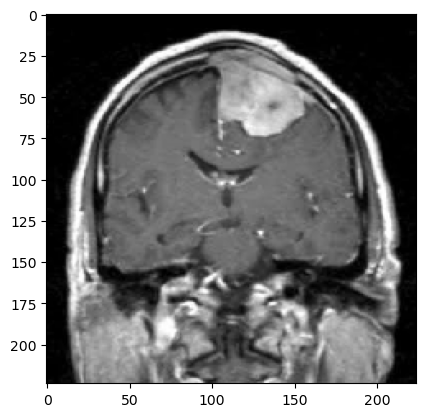

In [22]:
import matplotlib.pyplot as plt

predicted_values = model.predict(img_array)
predicted_index = np.argmax(predicted_values)
predicted_class = labels[predicted_index]

plt.imshow(img)
print(predicted_class)

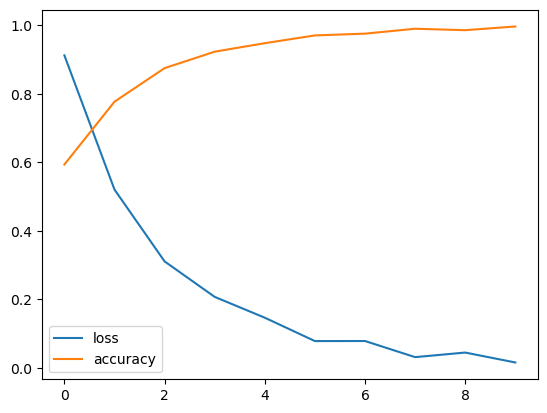

In [27]:
plt.plot(H.history['loss'], label = 'loss')
plt.plot(H.history['accuracy'], label = 'accuracy')
plt.legend()

In [28]:
model.evaluate(test_generator)

13/13 [==============================] - 7s 523ms/step - loss: 3.5159 - accuracy: 0.7284


[3.5158605575561523, 0.7284263968467712]